# ANALYSING DATA

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv ('./data/attacks_cleaned.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species,Month,Decade
0,2018.0,Boat,United States,Other,F,57.0,0.0,White shark,June,2010 - 2020
1,2018.0,Unprovoked,United States,Wading,F,11.0,0.0,NaN,June,2010 - 2020
2,2018.0,NaN,United States,Surfing,M,48.0,0.0,NaN,June,2010 - 2020
3,2018.0,Unprovoked,Australia,Surfing,M,NaN,0.0,NaN,June,2010 - 2020
4,2018.0,Provoked,Mexico,Swimming,M,NaN,0.0,Tiger shark,June,2010 - 2020
...,...,...,...,...,...,...,...,...,...,...
6296,NaN,Unprovoked,Australia,Swimming,M,NaN,1.0,NaN,NaN,NaN
6297,NaN,Unprovoked,Australia,Swimming,M,NaN,1.0,NaN,NaN,NaN
6298,NaN,Unprovoked,United States,Swimming,M,NaN,1.0,NaN,NaN,NaN
6299,NaN,Unprovoked,Panama,Other,M,NaN,1.0,NaN,NaN,NaN


In [4]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## OVERALL FATALITY PER DECADE

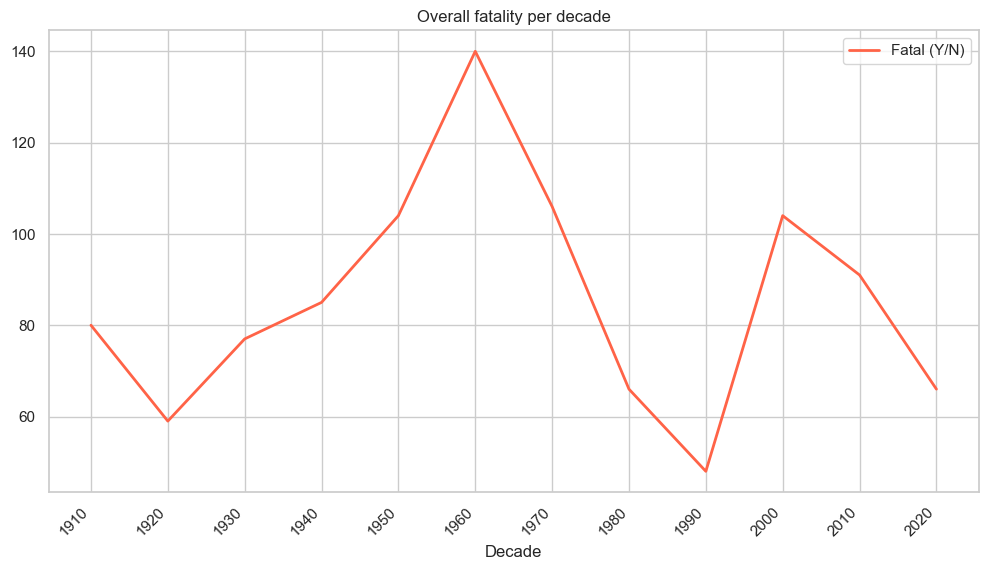

In [5]:
graph_1 = df.groupby(['Decade']).agg({'Fatal (Y/N)':'sum'}).sort_values(by= 'Decade').plot(title='Overall fatality per decade', linewidth=2.0, color='tomato')
x = ['1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45, ha='right')
graph_1.figure.savefig('images/graph_1.png', dpi=1000)

## THE ACTIVITY WITH MOST PROVOKED ATTACKS

In [6]:
df['Activity'].value_counts().head()

Swimming    1943
Surfing     1561
Other       1384
Fishing     1106
Wading       307
Name: Activity, dtype: int64

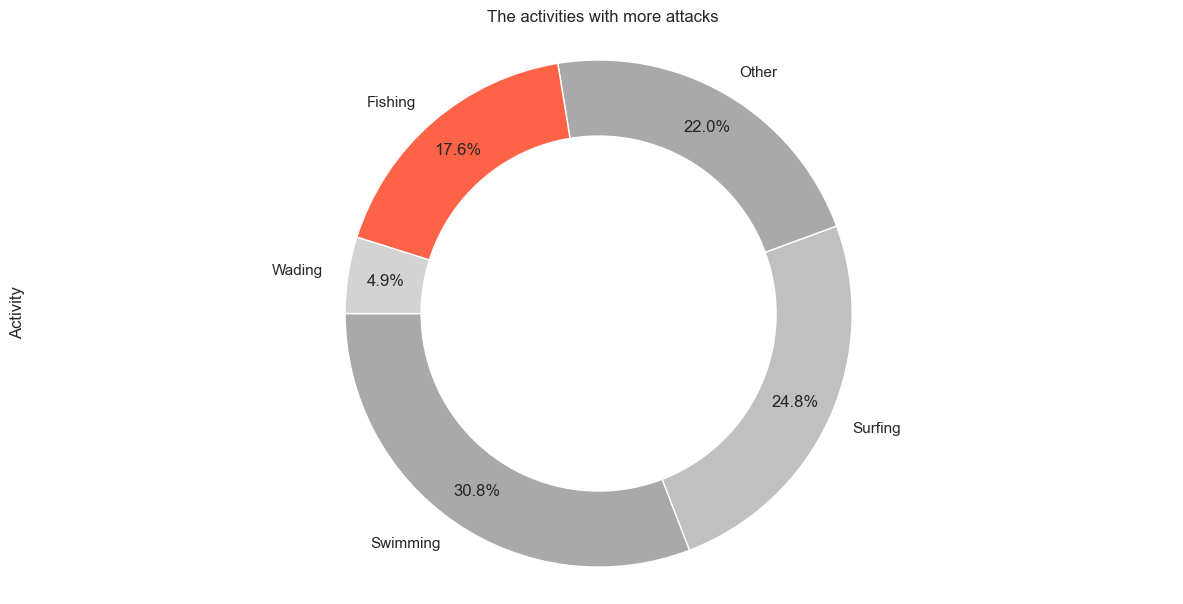

In [7]:
graph_2 = df.Activity.value_counts().head(10).plot(kind="pie", autopct='%1.1f%%', startangle=180, pctdistance=0.85, colors=['darkgray','silver','darkgrey','tomato','lightgray'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.title('The activities with more attacks')
graph_2.figure.savefig('images/graph_2.png', dpi=1000)

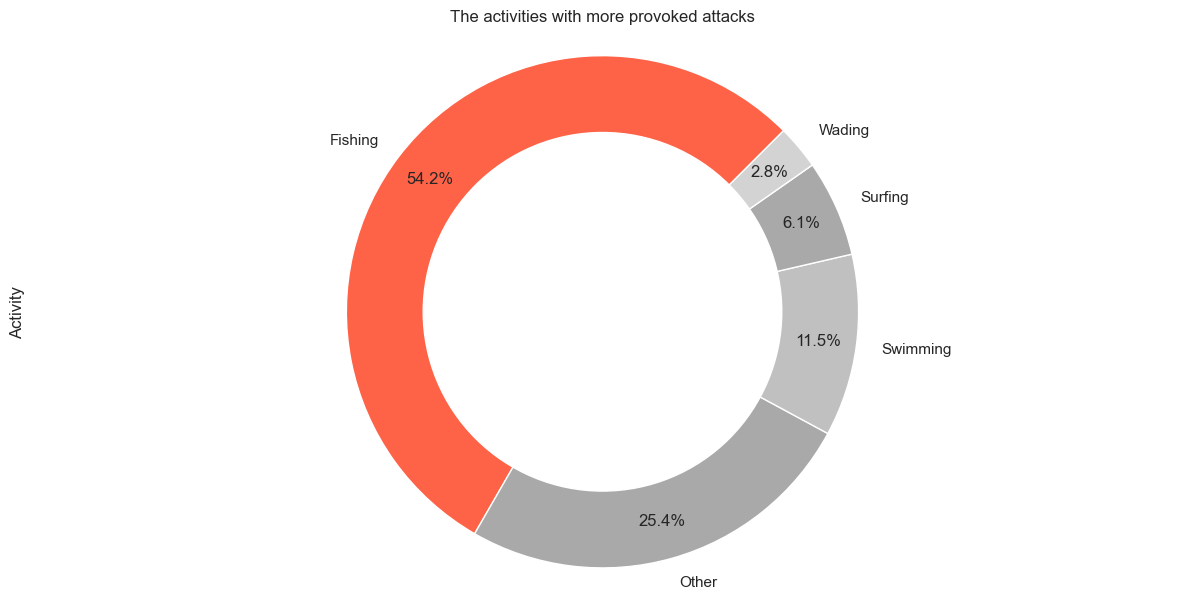

In [8]:
graph_3 = df[(df["Type"] == 'Provoked')].Activity.value_counts().head(10).plot(kind="pie", autopct='%1.1f%%', startangle=45, pctdistance=0.85, colors=['tomato','darkgray','silver','darkgrey','lightgray'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.title('The activities with more provoked attacks')
graph_3.figure.savefig('images/graph_3.png', dpi=1000)

## THE MOST DANGEROUS MONTHS TO SURF IN USA AND AUSTRALIA

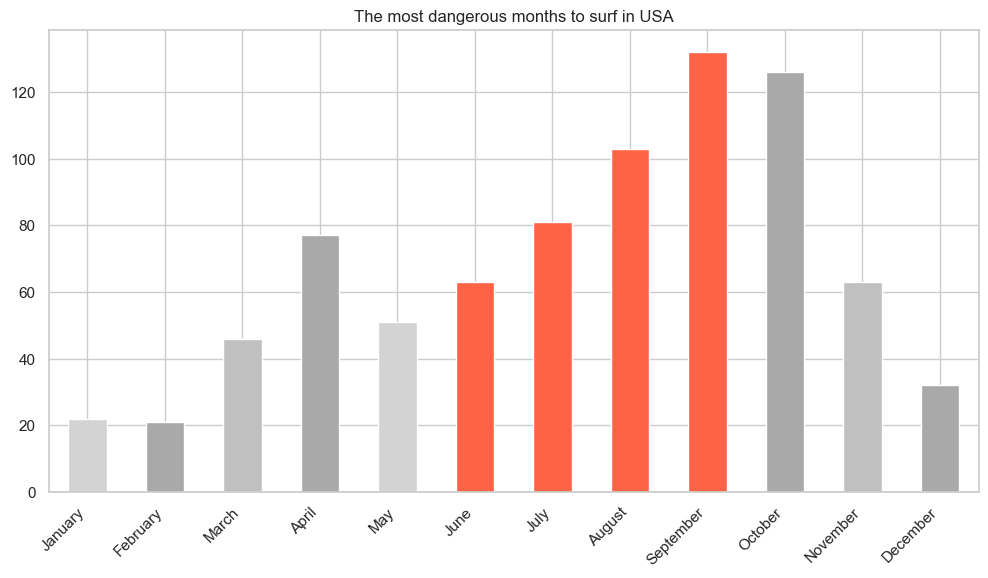

In [9]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
graph_4 = df[(df["Country"] == 'United States') & (df["Activity"]=="Surfing")].Month.value_counts().loc[months].plot(kind="bar", color=['lightgray','darkgray','silver','darkgrey','lightgray','tomato','tomato','tomato','tomato','darkgray','silver','darkgrey'])
plt.xticks(rotation=45, ha='right')
plt.title("The most dangerous months to surf in USA")
graph_4.figure.savefig('images/graph_4.png', dpi=1000)

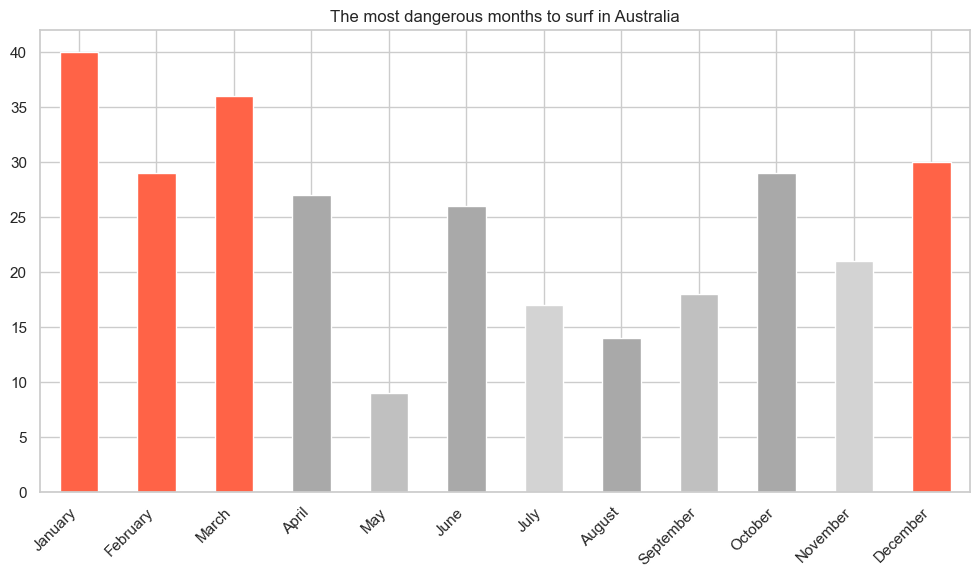

In [10]:
graph_5 =df[(df["Country"] == 'Australia') & (df["Activity"]=="Surfing")].Month.value_counts().loc[months].plot(kind="bar", color=['tomato','tomato','tomato','darkgray','silver','darkgrey','lightgray','darkgray','silver','darkgrey','lightgray','tomato'])
plt.xticks(rotation=45, ha='right')
plt.title("The most dangerous months to surf in Australia")
graph_5.figure.savefig('images/graph_5.png', dpi=1000)

## ATTACKS BY AGE AND SHARK SPECIES

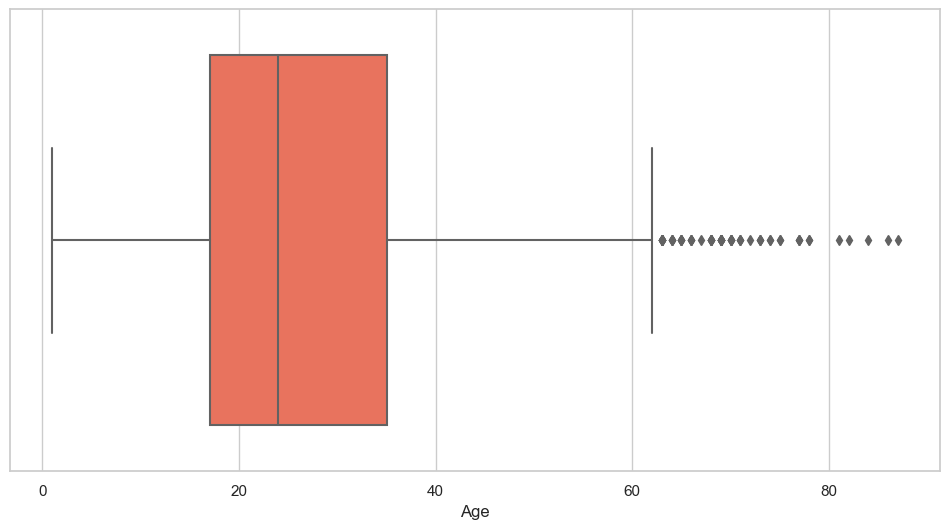

In [11]:
graph_6 =sns.boxplot(x="Age", data=df, color='tomato')
graph_6.figure.savefig('images/graph_6.png', dpi=1000)

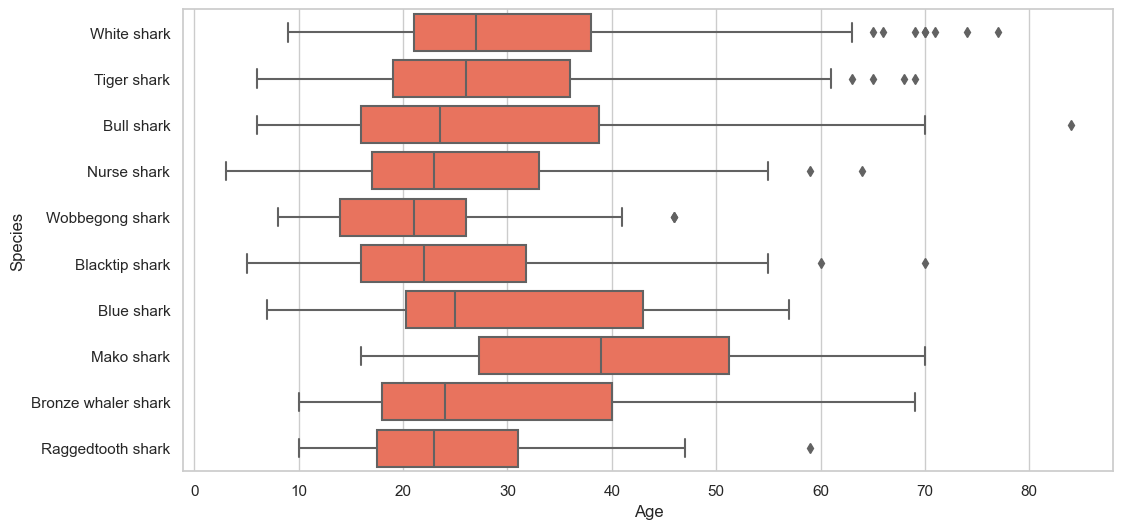

In [12]:
graph_7 = sns.boxplot(x="Age", y="Species", data=df, color='tomato')
graph_7.figure.savefig('images/graph_7.png', dpi=1000)